# Realtime plots of running code
March 30, 2022

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
import subprocess as sp

import time

In [9]:
# x=np.arange(1,10)
# plt.figure()

# for i in range(5):
#     clear_output(wait=True)  
#     y=x**i
#     plt.title('Form y=x^{0}'.format(i))
#     plt.plot(x,y,marker='*', linestyle='')
#     plt.pause(0.5)
#     plt.show()

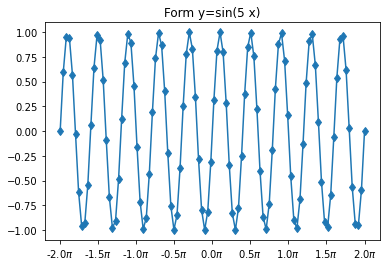

In [10]:
x=np.linspace(-np.pi*2,2*np.pi,num=100,endpoint=True)
x_ticks=np.arange(-2,2.2,0.5)
# plt.figure()

for k in range(1,6):
    clear_output(wait=True)  
    y=np.sin(k*x)
    plt.title('Form y=sin({0} x)'.format(k))
    plt.plot(x,y,marker='d', linestyle='-')
    plt.xticks(ticks=x_ticks*np.pi,labels=[str(ii)+'$\pi$' for ii in x_ticks])
    plt.pause(0.5)
    plt.show()

In [16]:
def f_gen_data(num,sleep_time):
    op_file='op.out'
    open(op_file,'w').close()

    x=np.linspace(-np.pi*2,2*np.pi,num=100,endpoint=True)

    with open(op_file,'a') as f:
        for k in range(1,num):
            y=np.sin(k*x)
            f.write(str(k)+"\t"+",".join([str(i) for i in y])+'\n')
            # print(str(k)+"\t"+",".join([str(i) for i in y])+'\n')
            time.sleep(sleep_time)

In [18]:
f_gen_data(100,0)

python: can't open file '/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/analysis_nbks/EC526_tests/test_op.py': [Errno 2] No such file or directory


CalledProcessError: Command 'python /Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/analysis_nbks/EC526_tests/test_op.py' returned non-zero exit status 2.

In [ ]:


def f_plot_realtime(num=50,pause=1,last_only=False):
    '''
    num= Number of plots you want
    pause=time before it loads next dataset
    last_only= True implies it will only plot the last line of the file
    
    '''
    op_file='op.out'
    for i in range(0,5):
        with open(op_file,'r') as f:
            lst=f.readlines()

        if last_only: idx=-1
        else: idx=i
        
        k=int(lst[i].split(',')[0])
        y=np.array(lst[i].split(',')[1:]).astype(np.float64)

        clear_output(wait=True)  
        plt.title('Iteration={0}'.format(k))
        plt.plot(x,y,marker='*', linestyle='--')
        plt.pause(1)
        plt.show()
        
        
f_plot_realtime(num=5,pause=2,last_only=True)